# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {high variance 모델은 학습된 특정 데이터에 매우 민감한 모델이다. 훈련 데이터의 노이즈를 포착하여 모델이 새로운 데이터에 노출될 때 예측에 큰 변동이 발생한다. 일반적으로 매개변수나 특성이 너무 많은 모델이나 지나치게 복잡한 모델에서 발생한다.


이는 generation 능력을 떨어뜨리고 과적합을 불러일으킨다. 모델의 신뢰성을 떨어뜨린다. }

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ 모델이 너무 단순하여 데이터의 관계를 정확하게 표현하지 못하는 과소적합과 관련이 있다. 이는 모델이 데이터의 중요한 특징이나 상호 작용을 설명하지 못하게 때문에 예측에 체계적인 오류가 발생한다.


문제를 지나치게 단순화하기 때문에 목표에서 벗어나는 예측을 생성한다. 훈련 데이터와 다른 데이터 세트에서도 일관되게 잘못된 예측이 발생한다. }

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ {bagging과 boosting을 통해 여러 모델의 예측을 평균화하여 분산을 줄일 수 있다. 또한 모델이 특정 데이터에 덜 민감해진다. }


- High bias problem : 🐻‍❄️ {여러개의 모델을 결합하여 강력한 모델을 형성하는 앙상블 기술인 부스팅은 이전 모델의 오류를 수정하려고 시도한다. 더 복잡하고 정확한 모델을 생성하여 높은 편향을 해결하는 데에 도움이 된다. }

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [1]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [2]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

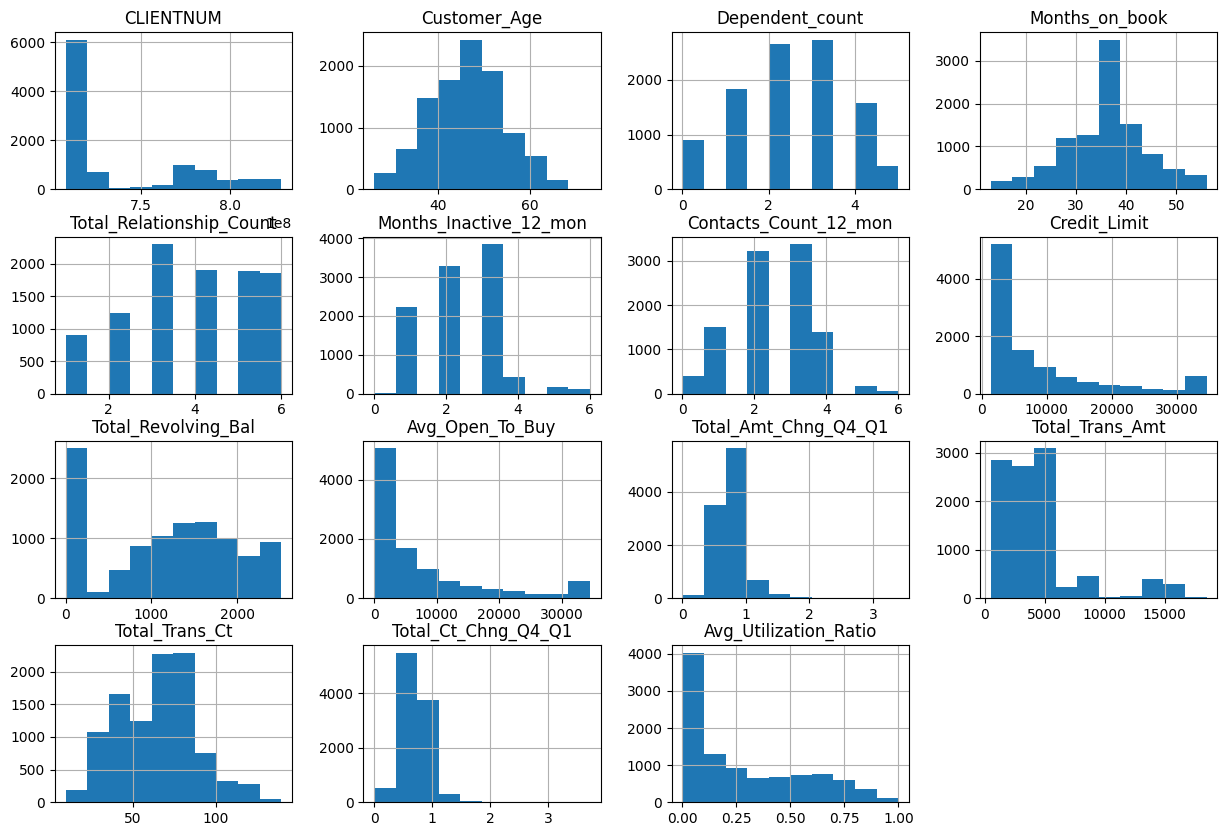

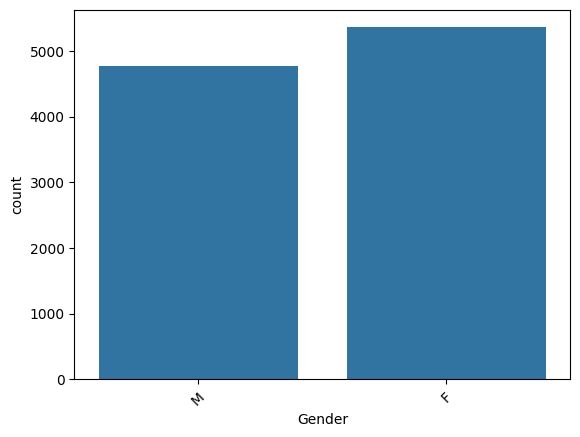

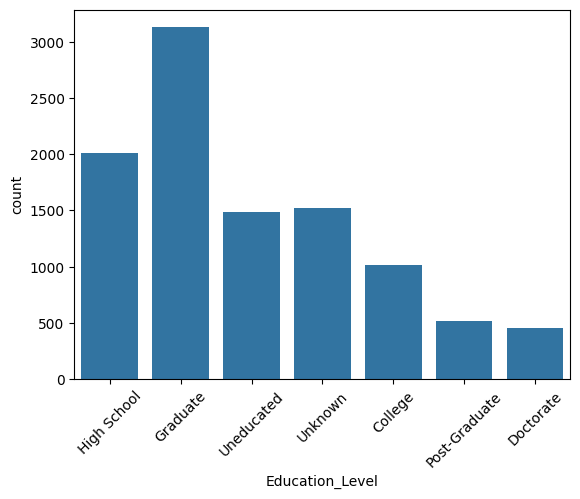

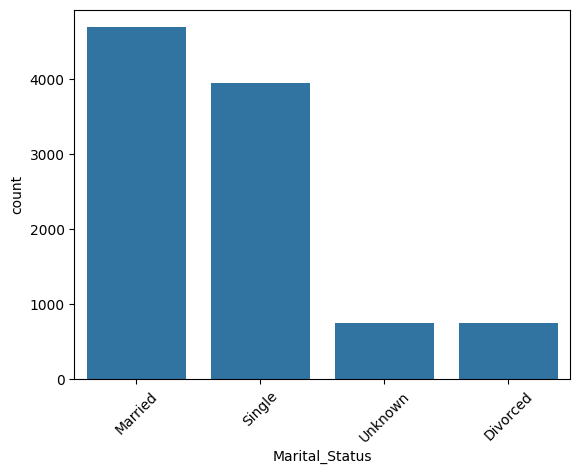

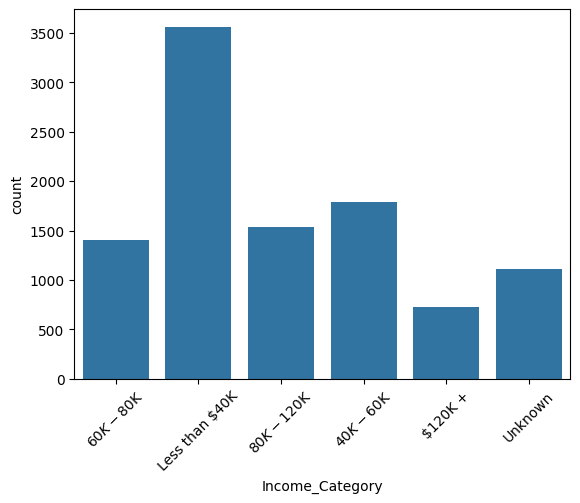

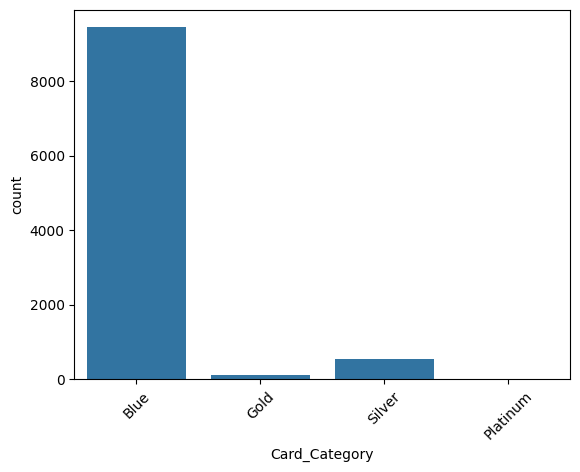

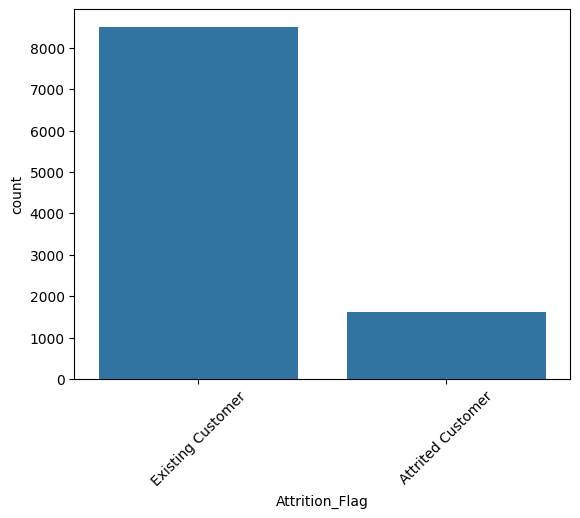

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(15, 10))
plt.show()

# 범주형 변수의 분포
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Attrition_Flag']
for feature in categorical_features:
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=45)
    plt.show()

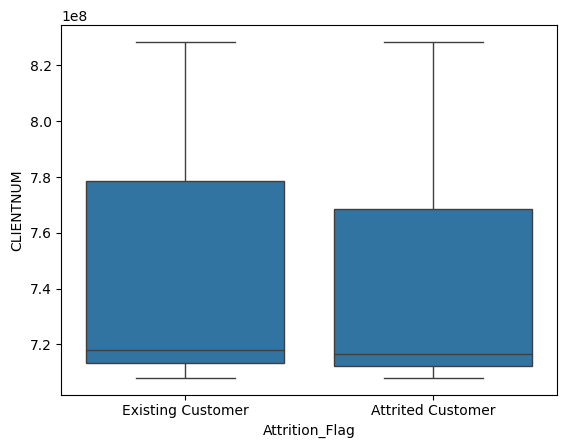

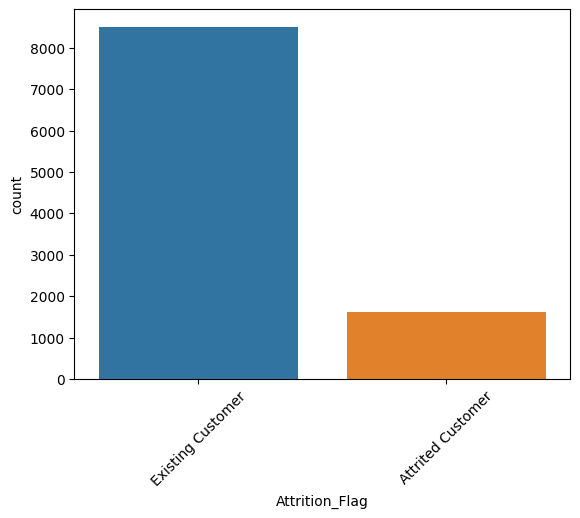

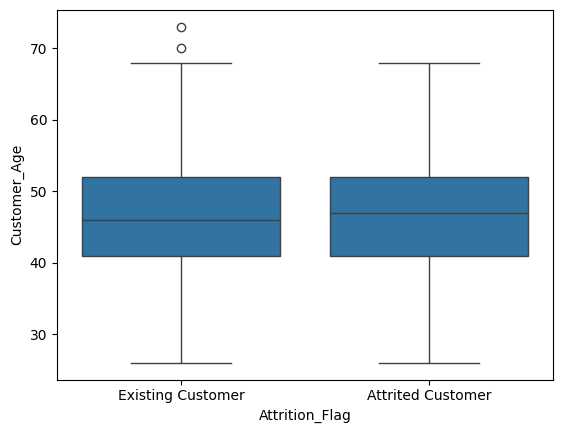

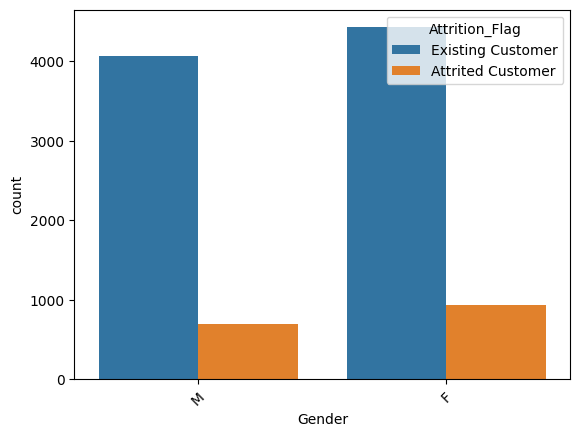

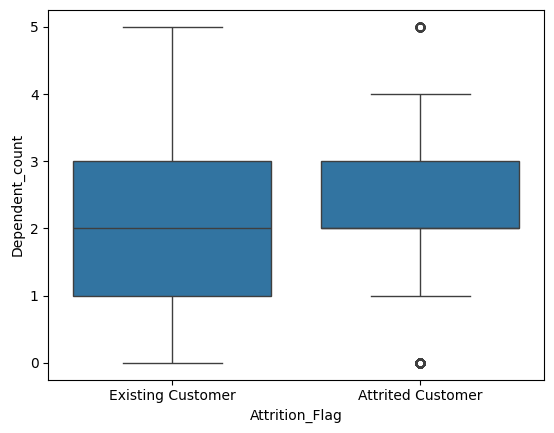

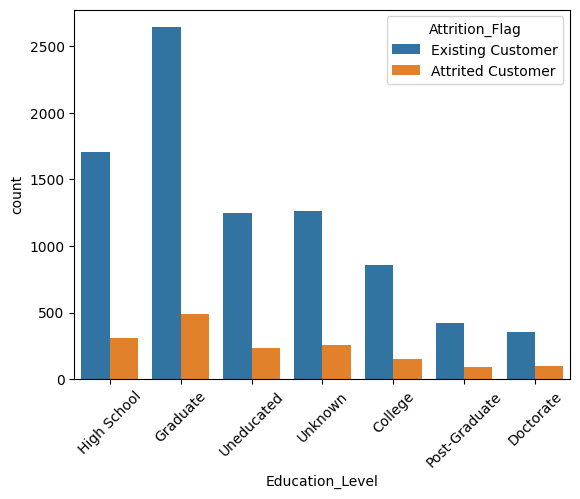

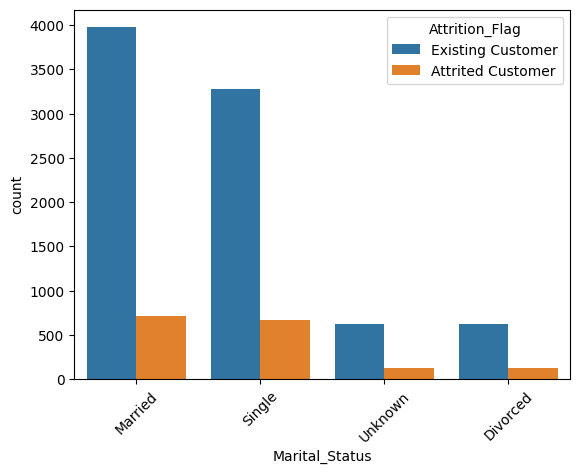

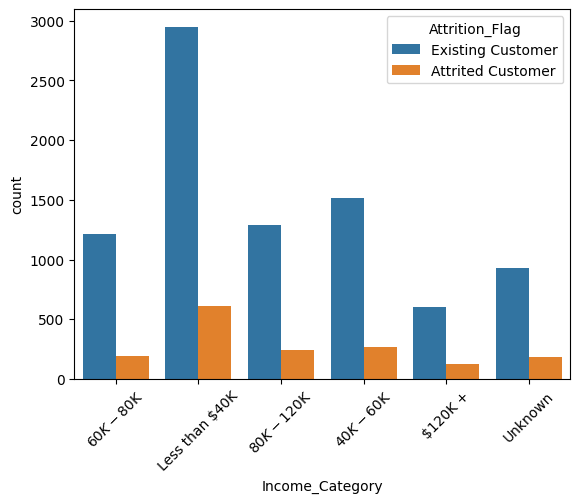

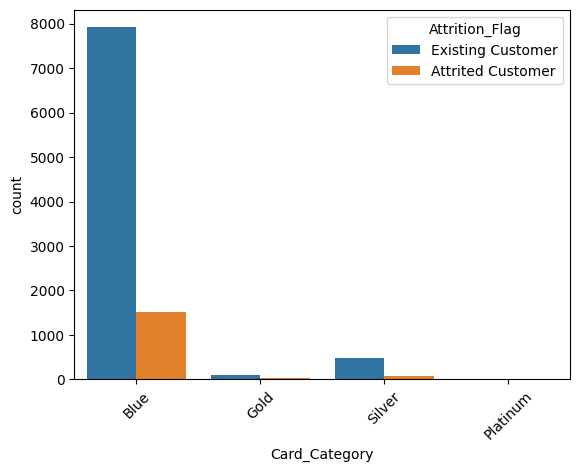

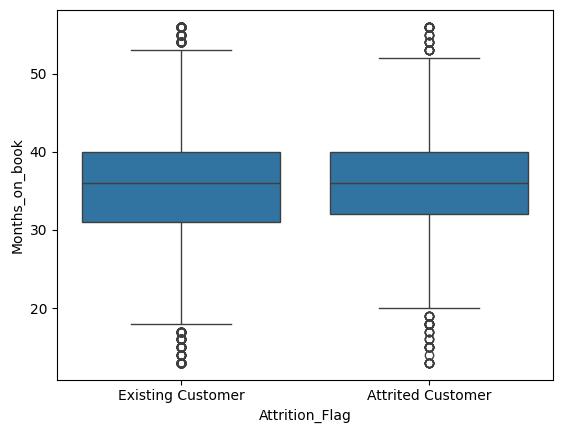

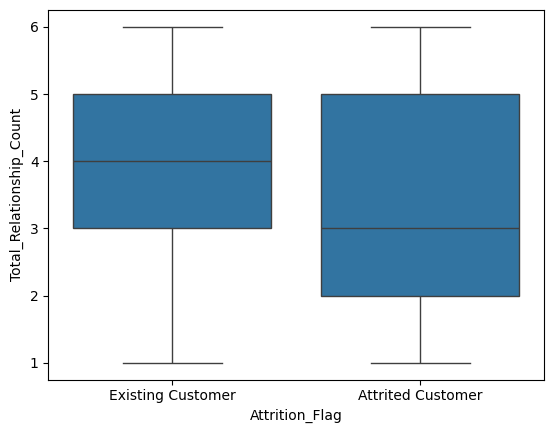

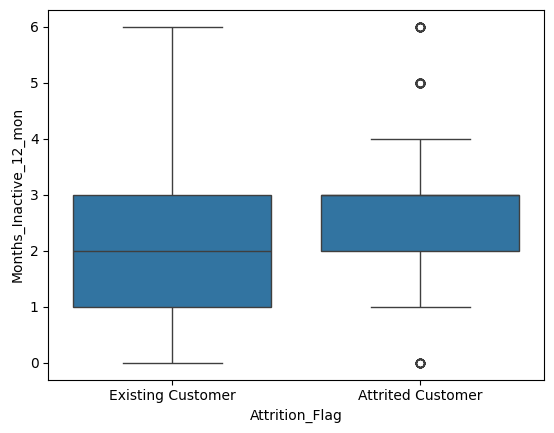

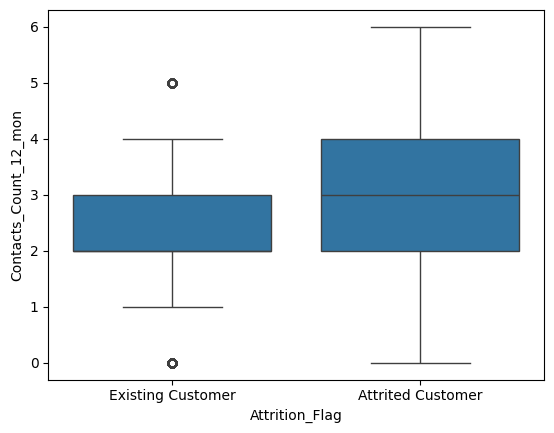

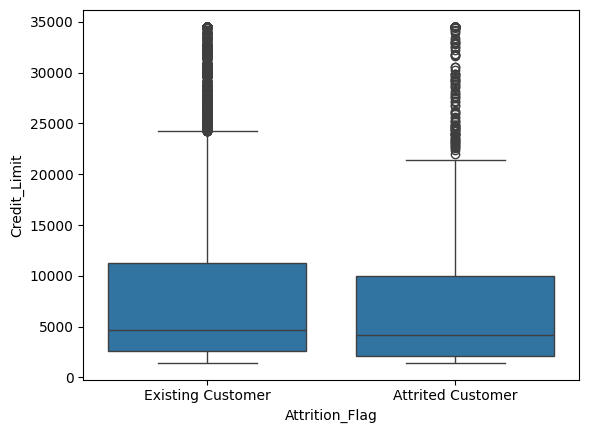

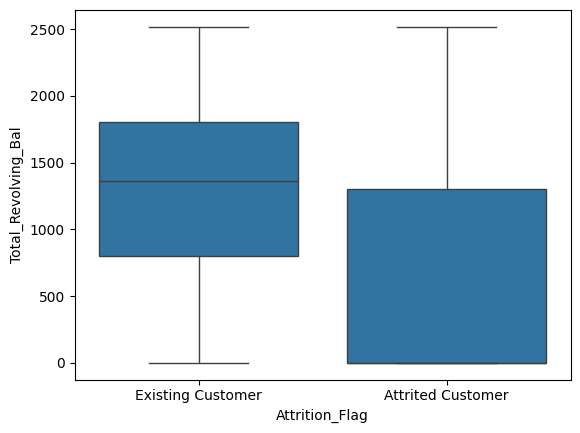

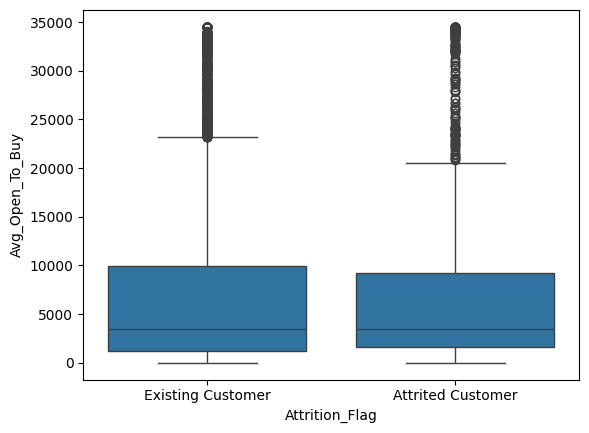

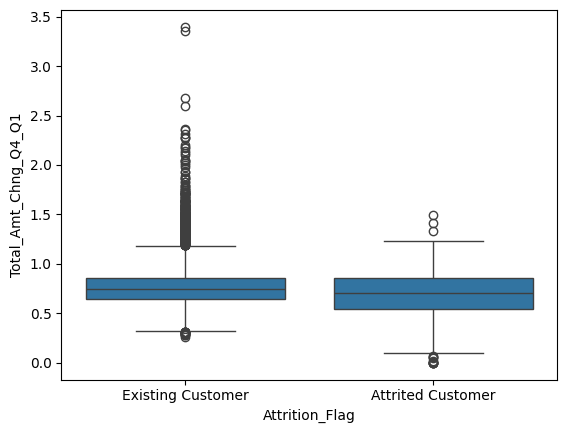

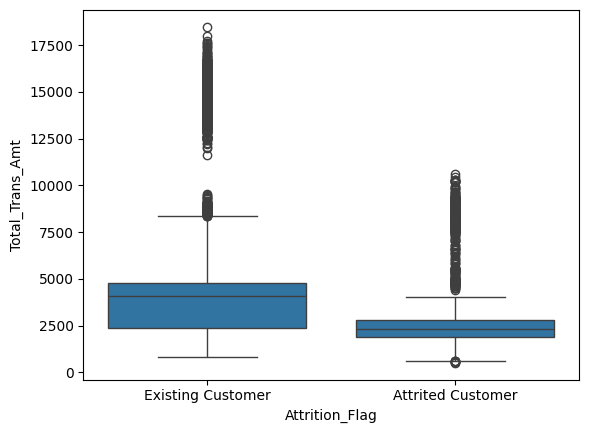

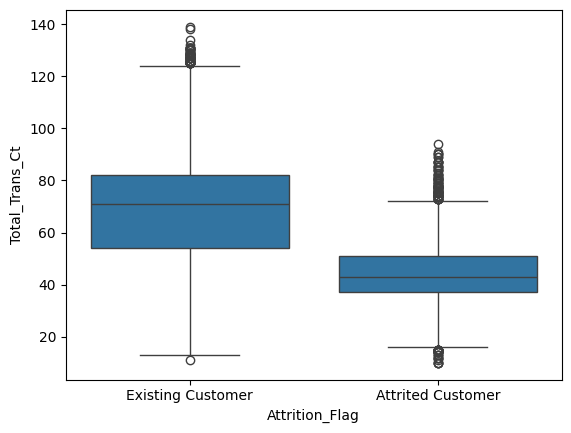

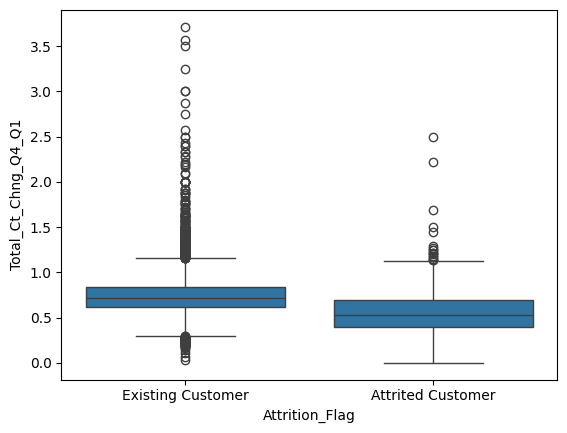

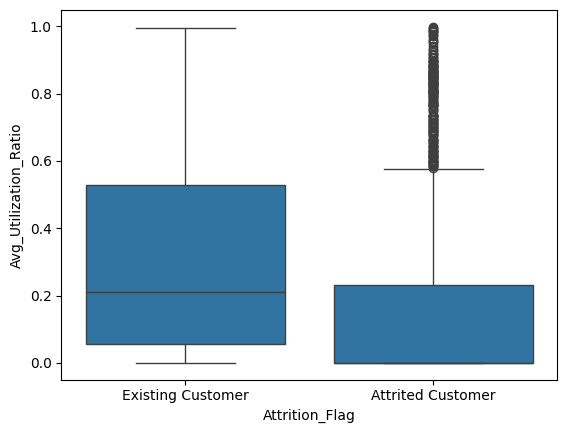

In [7]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        sns.countplot(data=df, x=feature, hue='Attrition_Flag')
        plt.xticks(rotation=45)
        plt.show()
    else:
        sns.boxplot(data=df, x='Attrition_Flag', y=feature)
        plt.show()

In [8]:
df.isnull().sum()


,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [9]:
from sklearn.preprocessing import StandardScaler
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])
df_encoded['Attrition_Flag'] = df_encoded['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})


scaler = StandardScaler()
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])


In [10]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [12]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test)

# 평가
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.9318854886475815
Precision: 0.7931034482758621
Recall: 0.7883064516129032
F1 Score: 0.7906976744186047
ROC AUC Score: 0.8740981727195464
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2543
           1       0.79      0.79      0.79       496

    accuracy                           0.93      3039
   macro avg       0.88      0.87      0.88      3039
weighted avg       0.93      0.93      0.93      3039



In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 평가
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9493254359986838
Precision: 0.9430051813471503
Recall: 0.7338709677419355
F1 Score: 0.8253968253968254
ROC AUC Score: 0.8626098841855568
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2543
           1       0.94      0.73      0.83       496

    accuracy                           0.95      3039
   macro avg       0.95      0.86      0.90      3039
weighted avg       0.95      0.95      0.95      3039



In [14]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# 예측
y_pred_ada = ada_model.predict(X_test)

# 평가
print("AdaBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost:
Accuracy: 0.953932214544258
Precision: 0.8852813852813853
Recall: 0.8245967741935484
F1 Score: 0.8538622129436326
ROC AUC Score: 0.9018776242182842
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2543
           1       0.89      0.82      0.85       496

    accuracy                           0.95      3039
   macro avg       0.93      0.90      0.91      3039
weighted avg       0.95      0.95      0.95      3039



In [15]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 평가
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting:
Accuracy: 0.9634748272458046
Precision: 0.9365079365079365
Recall: 0.8326612903225806
F1 Score: 0.8815368196371397
ROC AUC Score: 0.9108253364707672
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2543
           1       0.94      0.83      0.88       496

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039

